<a href="https://colab.research.google.com/github/dimmalaashok/Machine-Learning/blob/main/medical_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTEXT:**
This is a regression problem the aim of this model is to predict the insurance price based in the following Columns:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [48]:
import pandas as pd
import numpy as np

In [49]:
data= pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
num_att=[att for att in data.columns if data[att].dtype!='O']
cat_att=[att for att in data.columns if data[att].dtype=='O']
num_att, cat_att

(['age', 'bmi', 'children', 'charges'], ['sex', 'smoker', 'region'])

In [52]:
data.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [53]:
for att in cat_att:
    print(f"{att} : {data[att].unique()}")

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [54]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Exploratory Data Analysis**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

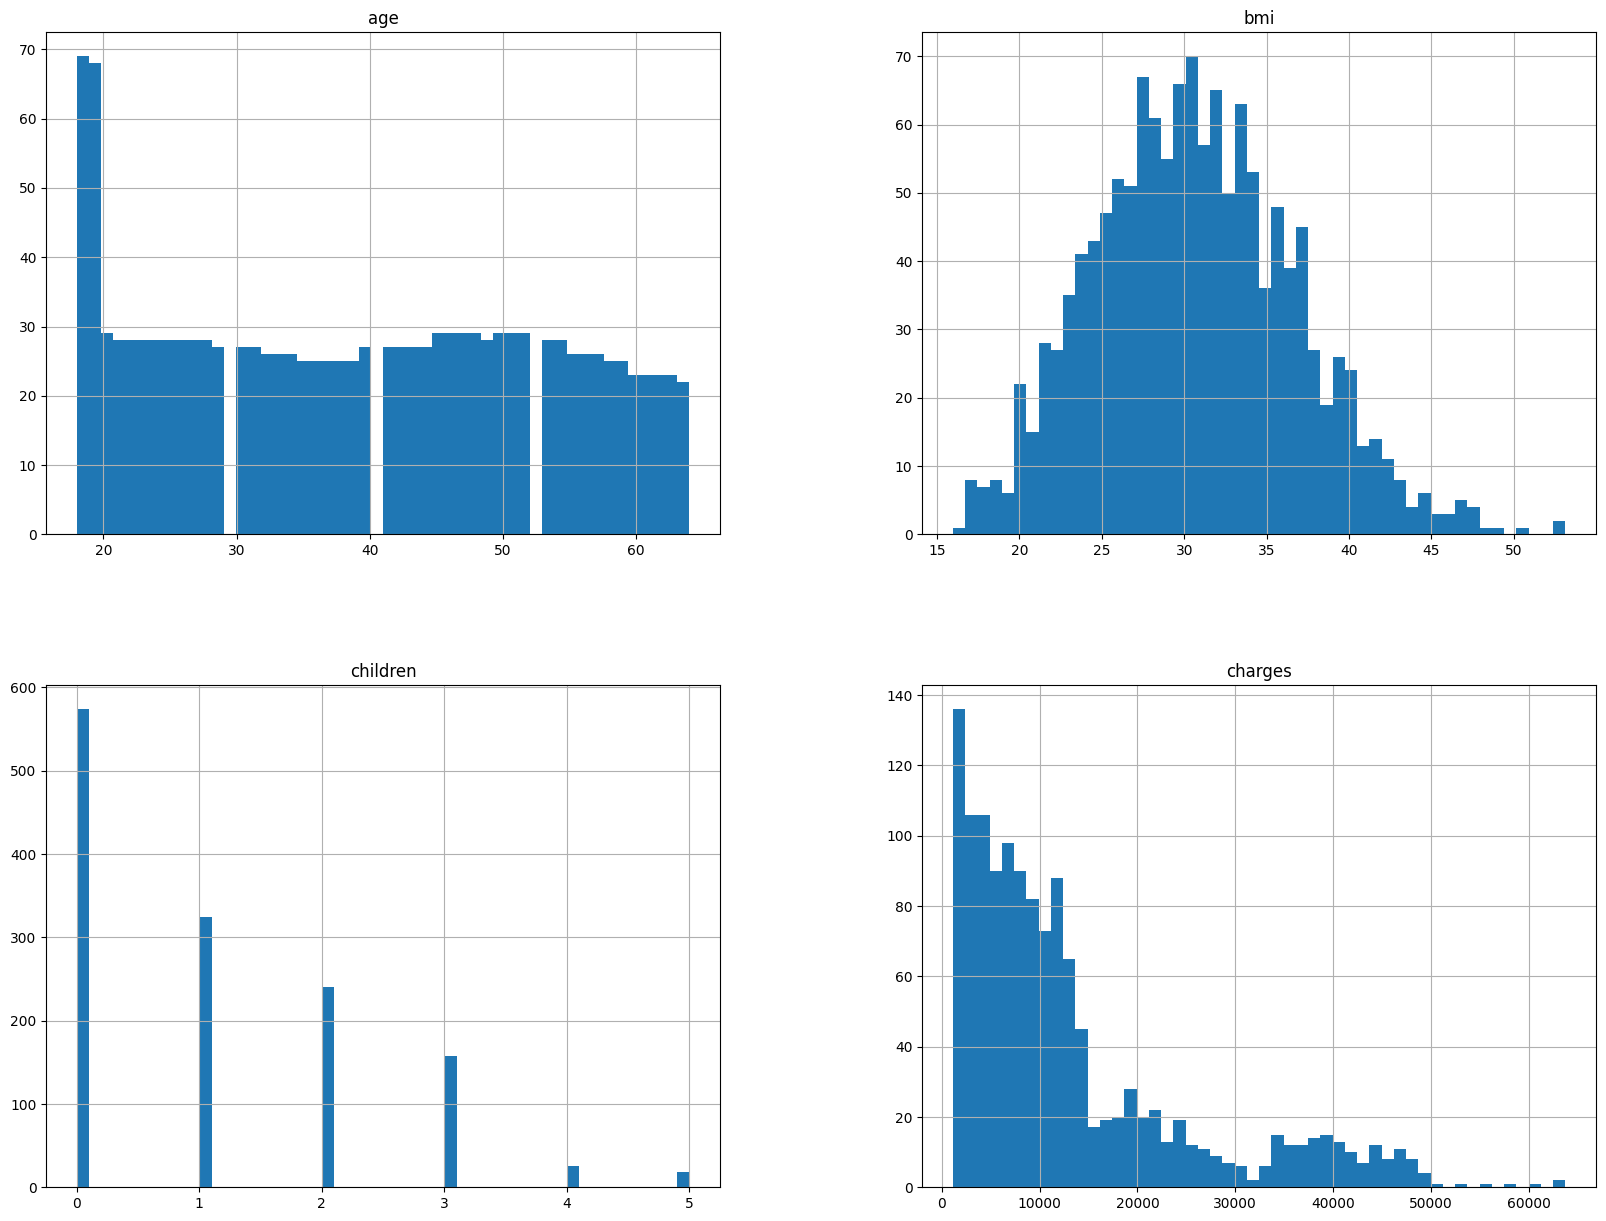

In [56]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [57]:
for att in num_att:
  if att=='charges':
    print(data.groupby('smoker')[att].sum().reset_index())
  else:
    print(data.groupby('smoker')[att].count().reset_index())
  print('\n')


  smoker   age
0     no  1064
1    yes   274


  smoker   bmi
0     no  1064
1    yes   274


  smoker  children
0     no      1064
1    yes       274


  smoker       charges
0     no  8.974061e+06
1    yes  8.781764e+06




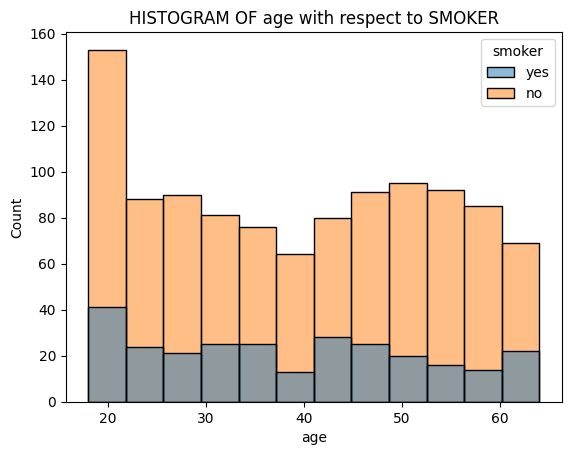

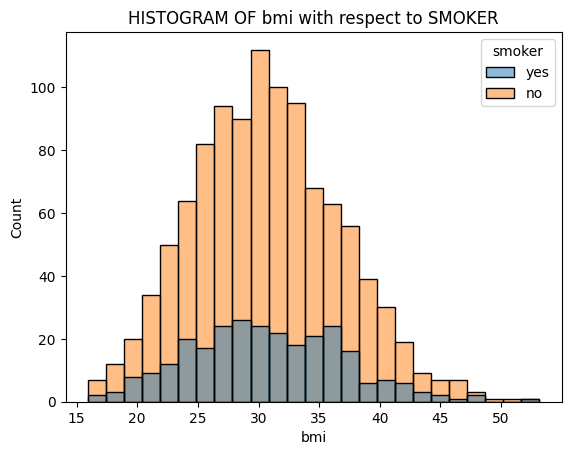

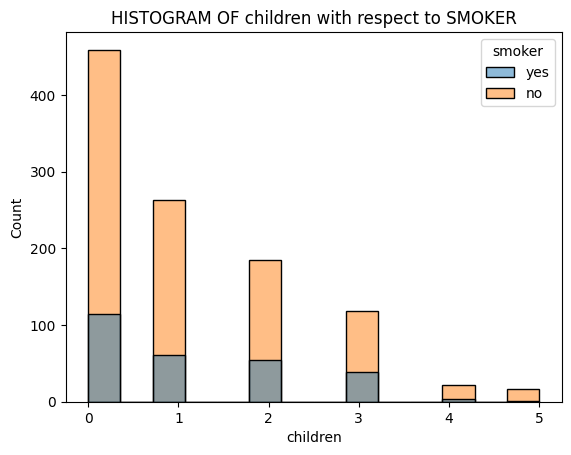

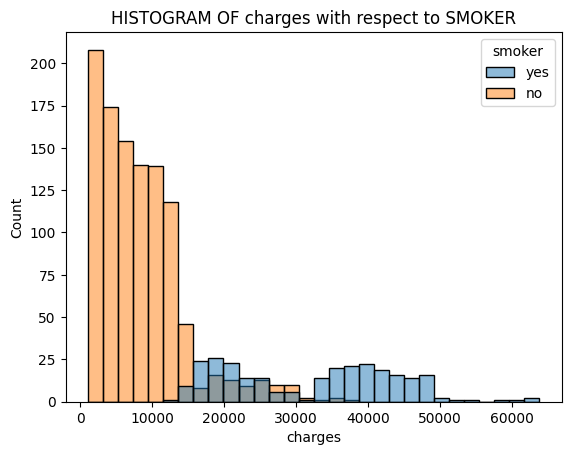

In [58]:
for att in num_att:
  sns.histplot(data=data,x=att,hue='smoker')
  plt.title(f'HISTOGRAM OF {att} with respect to SMOKER')
  plt.xlabel(att)
  plt.show()

In [59]:
for att in num_att:
  if att=='charges':
    print(data.groupby('sex')[att].sum().reset_index())
  else:
    print(data.groupby('sex')[att].count().reset_index())
  print('\n')

      sex  age
0  female  662
1    male  676


      sex  bmi
0  female  662
1    male  676


      sex  children
0  female       662
1    male       676


      sex       charges
0  female  8.321061e+06
1    male  9.434764e+06




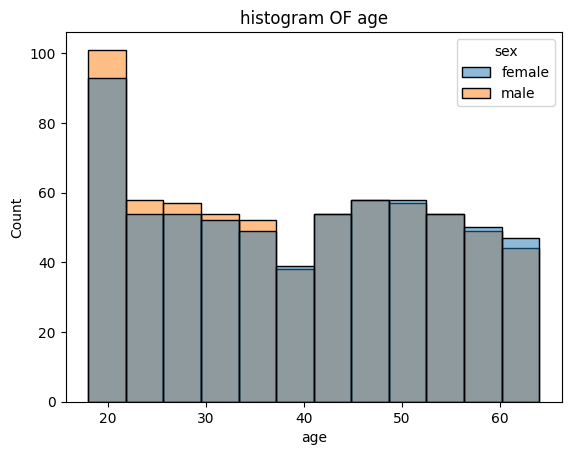

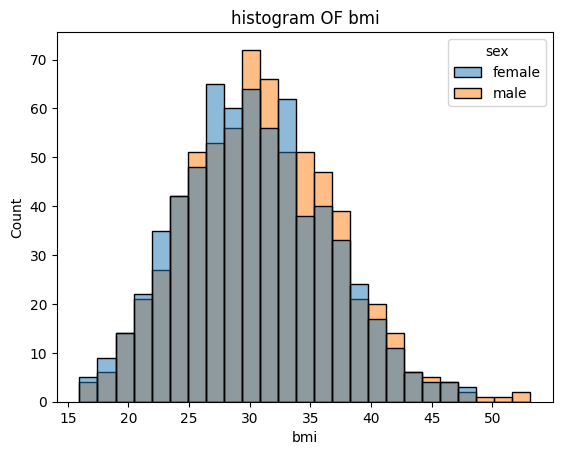

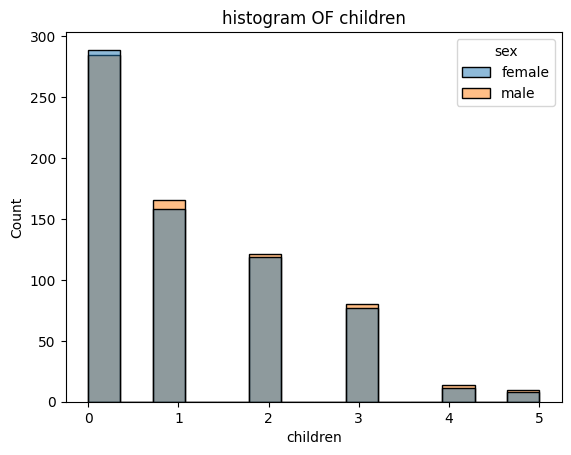

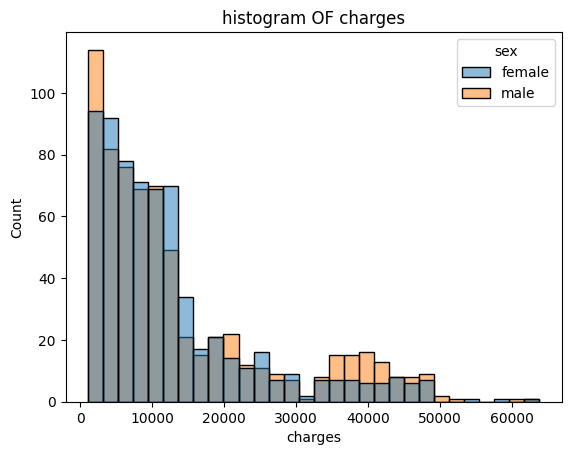

In [60]:
for att in num_att:
  sns.histplot(data=data,x=att,hue="sex")
  plt.title(f'histogram OF {att}')
  plt.xlabel(att)
  plt.show()

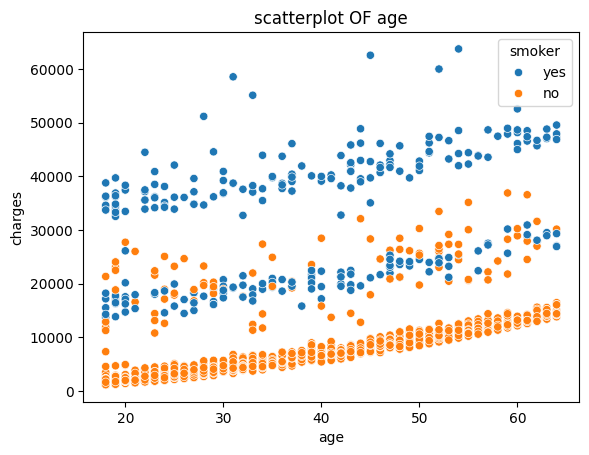

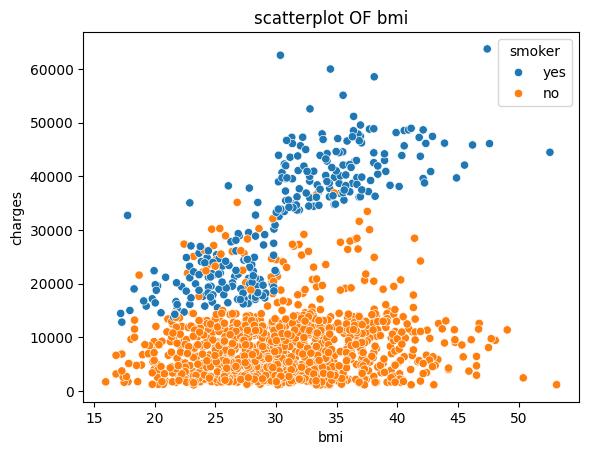

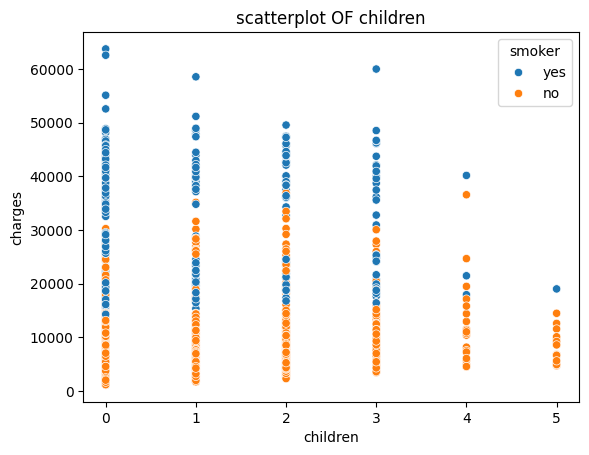

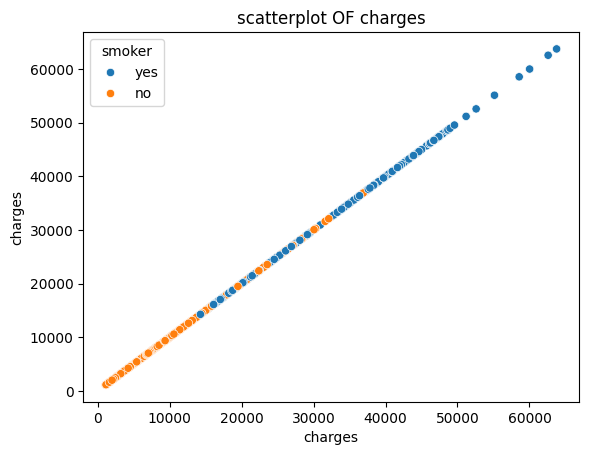

In [61]:
for att in num_att:
  sns.scatterplot(data=data,x=att,y='charges',hue='smoker')
  plt.title(f'scatterplot OF {att}')
  plt.xlabel(att)
  plt.show()

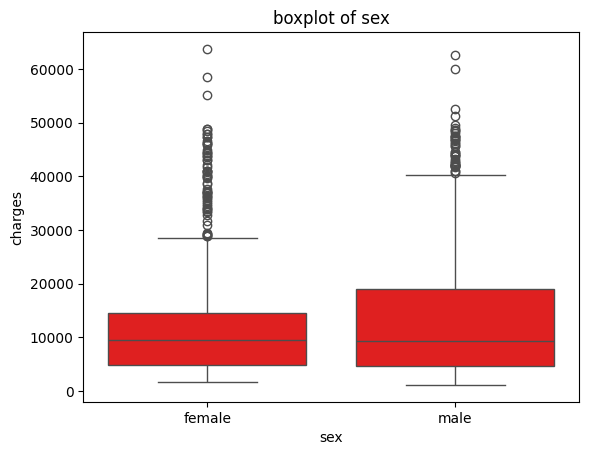

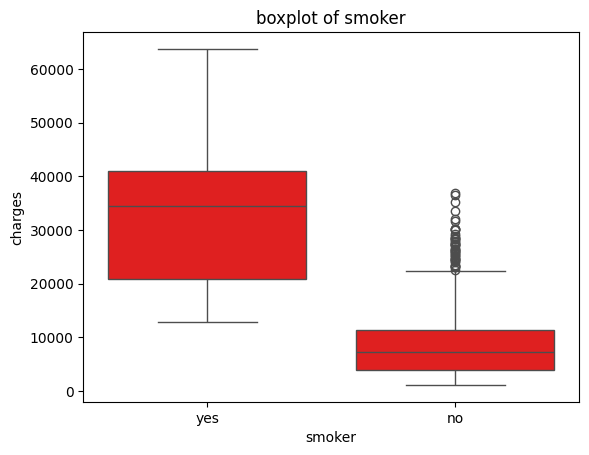

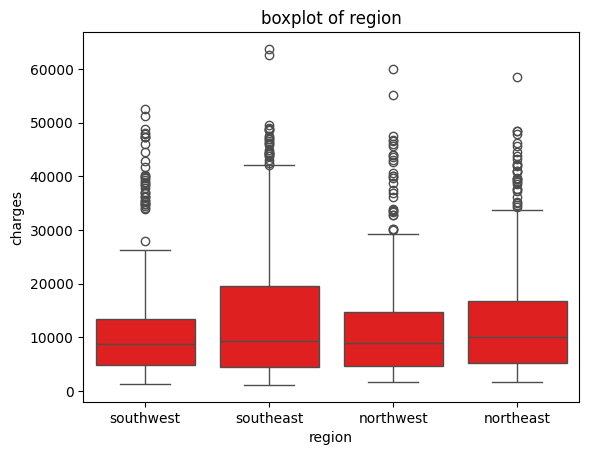

In [62]:
for att in cat_att:
  plt.title(f"boxplot of {att}")
  sns.boxplot(data=data,x=att,y='charges',color='red')
  plt.xlabel(att)
  plt.show()

In [63]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [64]:
data.corr(numeric_only=True)

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


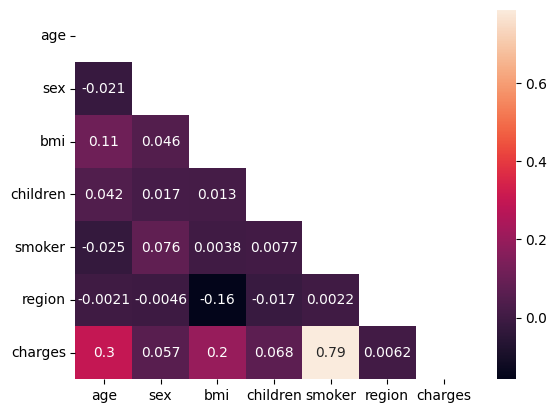

In [65]:
sns.heatmap(data.corr(),annot=True,mask=np.triu(data.corr()))
plt.show()

In [66]:
data.isna().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [68]:
df=data.copy()

# **Data Preprocessing**

In [69]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [70]:
train=df.drop('charges',axis=1)
test=df['charges']
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=66)


In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred=lr.predict(x_test)

In [73]:
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")
print(f"mean_absolute_error : {mean_absolute_error(y_test,y_pred)})")
print(f"r2_score : {r2_score(y_test,y_pred)}")

mean_squared_error : 33234495.730902884
mean_absolute_error : 3903.392526466937)
r2_score : 0.7782910086637806


In [74]:
df=StandardScaler().fit_transform(df)
df=pd.DataFrame(df,columns=data.columns)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,0.466915,-0.776802


In [75]:
Sx_train,Sx_test,Sy_train,Sy_test=train_test_split(df.drop('charges',axis=1),df['charges'],test_size=0.2,random_state=66)


In [76]:
lr.fit(Sx_train,Sy_train)
Spred=lr.predict(Sx_test)

In [77]:
print(f"mean_squared_error : {mean_squared_error(Sy_test,Spred)}")
print(f"mean_absolute_error : {mean_absolute_error(Sy_test,Spred)})")
print(f"r2_score : {r2_score(Sy_test,Spred)}")

mean_squared_error : 0.22679042115917836
mean_absolute_error : 0.3224482566660526)
r2_score : 0.7782910086637808


# **Machine Learning Models**

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

In [79]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
print(f"mean_squared_error : {mean_squared_error(y_test,dtpred)}")
print(f"mean_absolute_error : {mean_absolute_error(y_test,dtpred)})")
print(f'Cross_val_score:{np.mean(cross_val_score(dt,x_train,y_train,cv=5))}')
print(f"r2_score : {r2_score(y_test,dtpred)}")

mean_squared_error : 35684556.01055198
mean_absolute_error : 2819.287873395522)
Cross_val_score:0.7169575891469421
r2_score : 0.7619465334019266


In [80]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(f"mean_squared_error : {mean_squared_error(y_test,rfpred)}")
print(f"mean_absolute_error : {mean_absolute_error(y_test,rfpred)})")
print(f'Cross_val_score:{np.mean(cross_val_score(rf,x_train,y_train,cv=10))}')
print(f"r2_score : {r2_score(y_test,rfpred)}")

mean_squared_error : 22115359.592785258
mean_absolute_error : 2613.3629901301188)
Cross_val_score:0.8210413623312809
r2_score : 0.8524673246720871


In [81]:
svm=SVR()
svm.fit(x_train,y_train)
svmpred=svm.predict(x_test)
print(f'mean_squared_error : {mean_squared_error(y_test,svmpred)}')
print(f'mean_absolute_error : {mean_absolute_error(y_test,svmpred)}')
print(f'Cross_val_score:{np.mean(cross_val_score(svm,x_train,y_train,cv=10))}')
print(f'r2_score : {r2_score(y_test,svmpred)}')


# please don't try this model

mean_squared_error : 157384646.4112382
mean_absolute_error : 8033.044796207763
Cross_val_score:-0.10146617580317843
r2_score : -0.049920886123076436


In [82]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(f'mean_squared_error : {mean_squared_error(y_test,knnpred)}')
print(f'mean_absolute_error : {mean_absolute_error(y_test,knnpred)}')
print(f'Cross_val_score:{np.mean(cross_val_score(knn,x_train,y_train,cv=10))}')
print(f'r2_score : {r2_score(y_test,knnpred)}')

mean_squared_error : 123955506.82992227
mean_absolute_error : 7470.043850476865
Cross_val_score:0.04829268027329444
r2_score : 0.17308658412175315


In [83]:
# rf.predict([[age,sex,bmi,children,smoker,region]])

In [84]:
rf.predict([[24,1,10.54,0,1,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([16905.2220906])


# Output


*   Things that are observed from the above model


1.   Insurance starts from the age 18 which has the lowest insurance price.
2. Insurance ends at the age 64 which has the highest insurance price.

3.  Most of the times the persons who smokes have more health problems due to this it costs more incurance price
4.   Due to having high BMI causes health peoblems it also affect the insurance price




*   Most suited ML model for above Data

1.   Model - RandomForestRegressor
2.   r2_score - 85.46%






